In [0]:
##################################################################
# Scikit-Learn 4 通用学习模式
##################################################################
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.3)

knn = KNeighborsClassifier()
print(knn)
knn.fit(X_train, y_train)
print(knn.predict(X_test))
print(y_test)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[1 2 2 0 0 0 2 1 2 2 0 0 0 0 2 2 0 1 2 1 2 2 1 1 2 0 0 0 2 2 0 2 0 1 0 2 2
 2 1 0 0 0 1 0 2]
[1 2 2 0 0 0 2 1 2 2 0 0 0 0 2 2 0 1 2 1 2 2 1 1 2 0 0 0 1 2 0 2 0 1 0 2 2
 1 1 0 0 0 1 0 2]


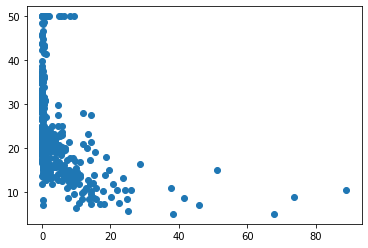

coef_: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
intercept_: 36.459488385090125
params: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
score: 0.7406426641094095


In [0]:
##################################################################
# Scikit-Learn 6 model 常用属性和功能
##################################################################
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target
plt.scatter(data_X[:, 0], data_y)
plt.show()

model = LinearRegression()
model.fit(data_X, data_y)

# y = model.coef_ * x + model.intercept_
print("coef_:", model.coef_)
print("intercept_:", model.intercept_)

# params: {'copy_X': True, 
#          'fit_intercept': True, 
#          'n_jobs': None, ---> 1 core
#          'normalize': False}
print("params:", model.get_params())

# R^2 coefficient of determination
print("score:", model.score(data_X, data_y)) 


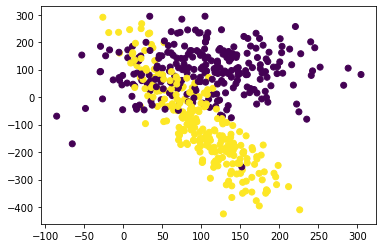

0.84


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
##################################################################
# Scikit-Learn 7 normalization 标准化数据
##################################################################
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# a = np.array([[10, 2.7, 3.6], 
#               [-100, 5, -2], 
#               [120, 20, 40]], dtype=np.float64)

# print(a)
# print(preprocessing.scale(a)) #normalize

X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0,
                           n_informative=2, 
                           random_state=22, 
                           n_clusters_per_class=1, 
                           scale=100)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df = SVC()
df.fit(X_train, y_train)
print(df.score(X_test, y_test))


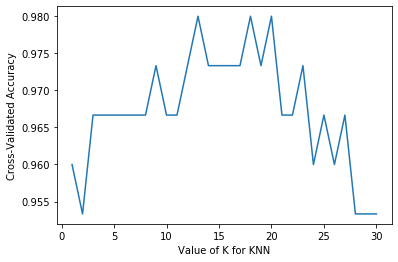

In [0]:
##################################################################
# Scikit-Learn 8 cross validation 交叉验证1 (机器学习 sklearn 教学教程tutorial)
##################################################################
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
# print(knn.score(X_test, y_test))

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


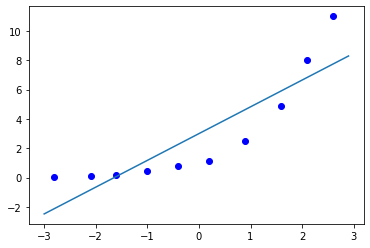

In [0]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

X = [-2.8, -2.1, -1.6, -1.0, -0.4, 0.2, 0.9, 1.6, 2.1, 2.6]
Y = [0.05, 0.12, 0.2, 0.43, 0.76, 1.1, 2.5, 4.9, 8, 11]
reg = linear_model.LinearRegression()
# 一维属性需要变维（reshape）
reg.fit(np.asarray(X).reshape([-1, 1]), Y) 
x = np.arange(-3.0, 3.0, 0.1)
y = (reg.coef_[0] * x + reg.intercept_)
plt.plot(np.asarray(X), np.asarray(Y), 'bo')
plt.plot(np.asarray(x), np.asarray(y))
plt.show()